# Intro to Image Processing: Filters

In this tutorial notebook, you will:
- Get familiar with basic image processing with OpenCV (reading images, displaying images, etc.)
- Learn how filters and convolution work.

## Reading and Displauing Images with OpenCV

In order to take advantage of OpenCV, we first need to install it (if it is not installed yet) and import it in this notebook. We would also need to install the `matplotlib` library in order to display images in this notebook. Finally, we will also import `numpy` in otder to access the image data in matrix form.

In [68]:
!pip install opencv-python
!pip install matplotlib

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In order to read an image, we can use the built in function in OpenCV, `cv2.imread`. 

In [70]:
im = cv2.imread('assets/fmnist.png')
im.shape

(280, 280, 3)

There are two things to note here:
- First, the image is saved into a numpy array. This means that we can index it as a numpy array, we can also use numpy functions like `np.mean`.
- Even though we have a 2-dimensional image, our numpy array has a third dimension of size 3. This actually represents the different **channels** of the image: Red, Green, and Blue (or RGB for short). 

**Exercise 1:** `matplotlib.pyplot` provides functionality to draw different types of graphs and visualizations. This package also gives functionality to display an image using `imshow`. In the following cell, pass the image as a parameter to the `plt.imshow` function.

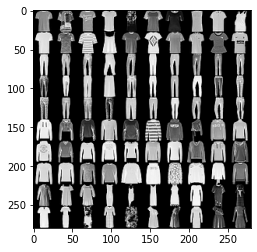

In [71]:
# plt.imshow(<YOUR CODE HERE>)
plt.imshow(im)

**Exervise 2:** Even though we have 3 channels in out image, it seems that the picture is actually grayscale. Write code to convert it into a greyscale image (Hint: use `numpy` to get the average across the third dimension)

In [72]:
# im = <YOUR CODE HERE>
im = np.mean(im, axis=2)
im.shape

(280, 280)

The picture above is a subset of (Fashion-MNIST)[https://github.com/zalandoresearch/fashion-mnist] dataset. Notice how the pictures are all displayed in a grid of 10x10 total images. 

**Exercise 2:** Using the information above and the `shape` of the full image, find the dimension `d` of each sub-image.

In [73]:
d = im.shape[0] // 10
print(f"Sub-images are of shape {d}x{d}")

Sub-images are of shape 28x28


**Exercise 3:** Now that we know the actual size of sample images, can we use that information to get a part of the image that represents the sub-image in the first row and first column of the grid?

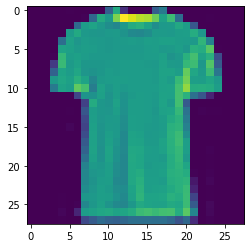

In [74]:
subim = im[:d,:d]
plt.imshow(subim)

Notice how the `imshow` function in `matplotlib` package by defult uses a colormap that takes value from dark-blue to yellow for grayscale images. In order to use a black to white colormap, we can pass the parameter `cmap='gray'` to the `imshow` function as follows:

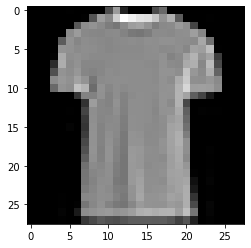

In [75]:
plt.imshow(subim, cmap='gray')

## Spatial Filters (Convolution)

In image processing, applying a filter is modifying each pixel of an image based on its neighborhood value. To understand what that means, refer to the animation below:

<center><img alt="2D Convolution" src="assets/2D_Convolution_Animation.gif"/></center>


*Source: https://commons.m.wikimedia.org/wiki/File:2D_Convolution_Animation.gif*

The two main components (or inputs) to this operation are:

1. **The input image $I$ :** the image we want to apply our filter on, and
2. **The kernel $K$ (or filter):** an n×n matrix.

If we assume a 3×3 convolution, let us consider every pixel $I(x, y)$ of the input image (where $x\in[0, W]$ and $y\in[0, H]$): each pixel $I_{out}(x,y)$ of the output image is calculated as follows:

$$I_{out}(x, y)=\sum_{i = x-1}^{x+1}\sum_{j = y-1}^{y+1}I(i, j) \times K(i-1, j-1)$$

Note that the above equation would fail in edge cases ($x = 0$, $x = W-1$, $y = 0$ or $y = H$). In the previous animation, a "padding" was added to the input image as a first step; then, convolution was applied to that padded image in order to produce an output of the same size as the input. For now, we can just skip edge pixels.

****

**Exercise 4:** To better understand convolution, let's build our own convolution function `conv` that takes as a parameter the input image `img` and the `kernel`. **Implement the convolution function defined below.**


In [91]:
def conv(img, kernel):
    # Create an empty image of the same size of th input
    img_out = np.zeros_like(img)

    # Store width and height for later use
    H, W = img.shape
    
    # Loop through the pixels of the image
    for x in range(1, W-1):
        for y in range(1, W-1):
            s = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    s += img[x+i][y+j] * kernel[i+1][j+1] 

            img_out[x+i][y+j] = s

    return img_out

In order to test our code, let us use the following kernel:

$$K=\begin{bmatrix}1 & 0 & 1\\1 & 0 & 1\\1 & 0 & 1\end{bmatrix}$$

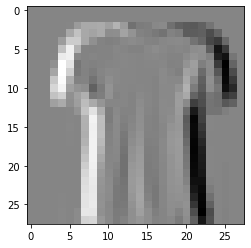

In [103]:
kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
out = conv(subim, kernel)
plt.imshow(a, cmap='gray')

The kernel (filter) we used is called Prewitt gradient edge detector. As the name implies, this filter is used to detect edges in the input image. Notice how it highlighted the vertical edges of the shirt. In fact, the filter we used only highlights the vertical edges. We can use the transpose of that kernel as a horiontal edge detector:

$$K'=\begin{bmatrix}1 & 1 & 1\\0 & 0 & 0\\1 & 1 & 1\end{bmatrix}$$

****
**Exercise 5:** Use the function we built in Exercise 4 with the new kernel to detect horizontal edges.

In [104]:
# Write your code here

**Exercise 6:** Fortunately, the OpenCV library provides a function for convolution `cv2.filter2D`. Use the OpenCV built in function for convolution to apply kernel $K$ on the image `subim`. (Hint: use [`cv2.filter2D` Documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) as a resource to know how to use the function)

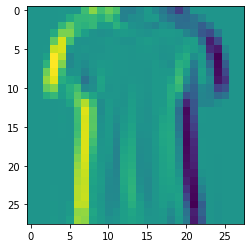

In [106]:
out = cv2.filter2D(subim,-1, kernel)
plt.imshow(out)